In [1]:
import pandas as pd
import numpy as np

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df_price = pd.read_csv('./data/df_price_cluster.csv')
df_sales = pd.read_csv('./data/df_sales_cluster.csv')

In [3]:
del(df_price['Unnamed: 0'])
print(df_price.shape)
df_price.head(1)

(3049, 4)


,item,price_min,price_max,price_mean
0,ACCESORIES_1_001,6.65,12.7414,11.032755


In [4]:
print(df_price.shape)
df_sales.head(1)

(3049, 4)


,item,sales
0,ACCESORIES_1_001,4093


In [5]:
df_cluster = pd.merge(df_price, df_sales, on=['item'], how='left')
df_cluster.head(1)

,item,price_min,price_max,price_mean,sales
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093


In [6]:
#Created colum "total_income" that represent the total income for product
df_cluster['income']= df_cluster['price_mean']*df_cluster['sales']
df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,income
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185


In [7]:
df_cluster.describe().T

,count,mean,std,min,25%,50%,75%,max
price_min,3049.0,3.630382,3.568067,0.012000,1.237500,2.400000,4.776000,3.588340e+01
price_max,3049.0,5.974956,5.517955,0.300000,2.856000,4.416000,7.475000,1.341500e+02
price_mean,3049.0,5.566813,4.538464,0.239601,2.628430,4.185494,7.190740,3.949448e+01
sales,3049.0,21546.542801,44252.433426,568.000000,4310.000000,9526.000000,21406.000000,1.002529e+06
income,3049.0,76059.791880,113715.620975,558.879300,21808.820666,43503.828743,84068.787748,1.759780e+06


<Axes: xlabel='sales', ylabel='income'>

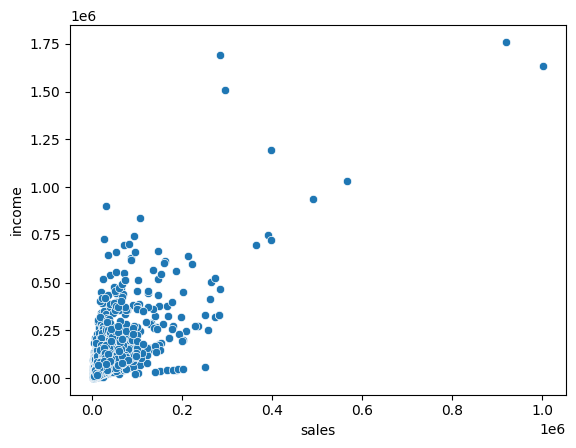

In [8]:
sns.scatterplot(data= df_cluster , x='sales', y='income')

In [9]:
df_cluster1 = df_cluster.copy()

In [10]:
df_cluster1.head(1)

,item,price_min,price_max,price_mean,sales,income
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966


In [11]:
#Only work with "price_max", "price_mean" and income variables
df_cluster1.drop(columns=['item','price_min','sales'], axis=1,inplace=True)

In [12]:
df_cluster1.head(1)

,price_max,price_mean,income
0,12.7414,11.032755,45157.065966


# Start Clustering

## Scale my variables

In [13]:
scaaler = StandardScaler()
df_cluster_scaled = scaaler.fit_transform(df_cluster1)

In [14]:
df_cluster_scaled.head()

,price_max,price_mean,income
0,1.226460,1.204557,-0.271799
1,-0.125947,-0.064152,-0.434224
2,0.356195,-0.357600,-0.619190
3,0.035570,0.091783,1.392614
4,-0.340500,-0.382283,-0.176173


## Using PCA

In [15]:
# from sklearn.decomposition import PCA

In [90]:
# pca = PCA()
# pca.fit(df_cluster_scaled)
# pca_data_scaled = pca.transform(df_cluster_scaled)
# pca_data_scaled

In [91]:
# var = pca.explained_variance_ratio_
# print(var)

In [92]:
# cum_var = np.cumsum(np.round(var, decimals=4)*100)
# plt.figure(figsize=(10,10))
# plt.plot(cum_var, 'r-x')
# plt.show()

In [18]:
sum_of_squared_distances = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_cluster_scaled)
    sum_of_squared_distances.append(km.inertia_)

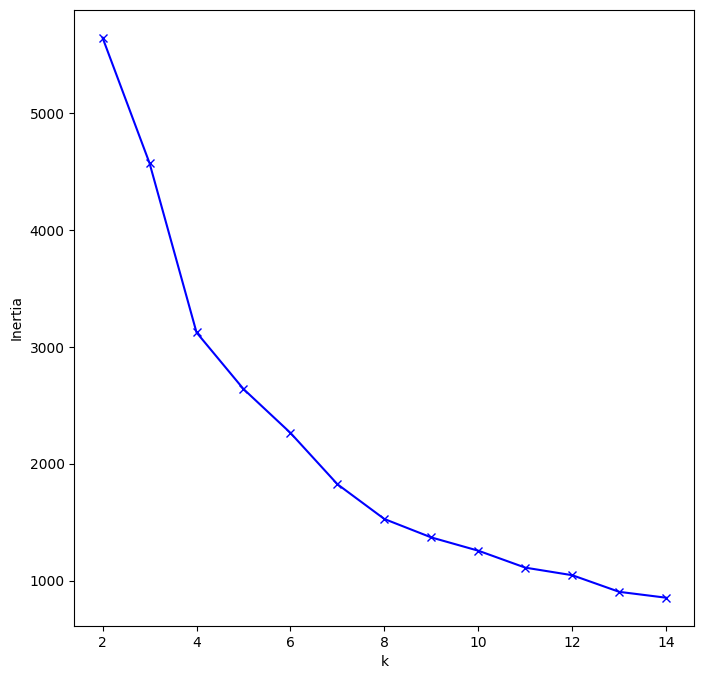

In [19]:
plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [21]:
# Uso Kmean for identify "codo"
km = KMeans(n_clusters = 4, random_state=12)
y = km.fit_predict(df_cluster_scaled)
#print(silhouette_score(df_cluster_scaled, y))
df_cluster['k_means'] = y

In [22]:
# Clustered completed
df_cluster.head(2)

,item,price_min,price_max,price_mean,sales,income,k_means
0,ACCESORIES_1_001,6.65,12.7414,11.032755,4093,45157.065966,3
1,ACCESORIES_1_002,2.66,5.2801,5.275708,5059,26689.806185,0


In [23]:
df_cluster

,item,price_min,price_max,price_mean,sales,income,k_means
0,ACCESORIES_1_001,6.6500,12.7414,11.032755,4093,45157.065966,3
1,ACCESORIES_1_002,2.6600,5.2801,5.275708,5059,26689.806185,0
2,ACCESORIES_1_003,1.2502,7.9401,3.944125,1435,5659.819343,0
3,ACCESORIES_1_004,5.0141,6.1712,5.983299,39175,234395.740703,3
4,ACCESORIES_1_005,1.9950,4.0964,3.832119,14621,56029.417625,0
...,...,...,...,...,...,...,...
3044,SUPERMARKET_3_823,1.1880,3.5760,3.344609,15388,51466.838609,0
3045,SUPERMARKET_3_824,2.4000,3.2160,3.026692,8325,25197.214839,0
3046,SUPERMARKET_3_825,2.3880,5.2560,4.934385,13526,66742.496388,0
3047,SUPERMARKET_3_826,1.2000,1.5360,1.535790,12188,18718.210119,0


<function matplotlib.pyplot.show(close=None, block=None)>

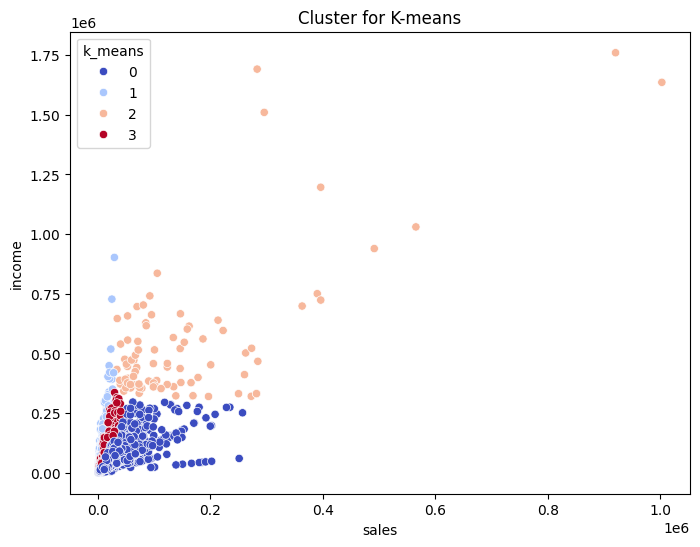

In [24]:
plt.figure(figsize=(8,6))
plt.title('Cluster for K-means')
sns.scatterplot(data=df_cluster, x='sales', y='income', hue='k_means',palette='coolwarm')
plt.show

In [25]:
file_name = "cluster_DSMARKET.csv"
df_cluster.to_csv(file_name)